In [263]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

import geopandas as gpd

import seaborn as sns

import numpy as np

import scipy

from matplotlib.colors import LogNorm

from sklearn import preprocessing


In [3]:
data = pd.read_csv("../../data/companyData/supplierCustomerHQs.csv").drop(columns = {'Unnamed: 0'}).drop_duplicates()
data['supplier_gvkey_year'] = data.supplier_gvkey.astype('str') + '_' + data.year.astype('str').str.slice(0,4)
data['customer_gvkey_year'] = data.customer_gvkey.astype('str') + '_' + data.year.astype('str').str.slice(0,4)


In [4]:
data.shape

(61262, 24)

In [5]:
supplierHQ = data[['supplier_gvkey_year','supplier_ind','supplier_latitude','supplier_longitude']].\
    rename(columns = {'supplier_gvkey_year': 'gvkey_year',
                     'supplier_ind': 'ind',
                     'supplier_latitude': 'latitude',
                     'supplier_longitude': 'longitude'})

customerHQ = data[['customer_gvkey_year','customer_ind','customer_latitude','customer_longitude']].\
    rename(columns = {'customer_gvkey_year': 'gvkey_year',
                     'customer_ind': 'ind',
                     'customer_latitude': 'latitude',
                     'customer_longitude': 'longitude'})

hqs = supplierHQ.append(customerHQ).drop_duplicates()
hqs.to_csv("../../data/companyData/justHQs.csv")


hqs.head()

,gvkey_year,ind,latitude,longitude
0,11318.0_1997,wholesale,41.41278,-81.50616
1,61402.0_1997,manu,33.61963,-111.90171
2,10686.0_1997,wholesale,40.59778,-74.69065
3,61575.0_1997,manu,41.52176,-87.61784
4,11506.0_1997,transportUtilities,36.15089,-95.99398


In [5]:
data

,year,supplier_gvkey,customer_gvkey,salecs,firstYear,lastYear,customer_ind,supplier_ind,customer_cstatCompanies,customer_igCompanies,...,customer_latitude,customer_longitude,customer_zipcode,supplier_latitude,supplier_longitude,supplier_zipcode,dist,suppliers,supplier_gvkey_year,customer_gvkey_year
0,1997-01-01,11318.0,6307.0,8.950,2000-01-01,2003-01-01,retail,wholesale,sears,sears,...,42.077450,-88.223510,60179,41.412780,-81.506160,44146,563,1,11318.0_1997,6307.0_1997
1,1997-01-01,61402.0,1318.0,5.725,2000-01-01,2003-01-01,transportUtilities,manu,alltel,alltel,...,34.743110,-92.265130,72203,33.619630,-111.901710,85260,1811,1,61402.0_1997,1318.0_1997
2,1997-01-01,10686.0,7257.0,19.000,2000-01-01,2002-01-01,manu,wholesale,merck,merck,...,40.598300,-74.762660,8889,40.597780,-74.690650,8876,6,1,10686.0_1997,7257.0_1997
3,1997-01-01,61575.0,6242.0,3.081,2000-01-01,2002-01-01,manu,manu,smurfit stonentainer,smurfit stonentainer,...,38.651980,-90.342860,63105,41.521760,-87.617840,60411,394,1,61575.0_1997,6242.0_1997
4,1997-01-01,11506.0,9899.0,160.080,2000-01-01,2000-01-01,transportUtilities,transportUtilities,at t,at t,...,29.426040,-98.486910,78299,36.150890,-95.993980,74102,781,1,11506.0_1997,9899.0_1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61257,2023-01-01,4115.0,126136.0,93.511,2003-01-01,2020-01-01,transportUtilities,construction,chartermmunications,chartermmunications,...,41.049852,-73.538904,6901,26.849613,-80.058388,33408,1685,1,4115.0_2023,126136.0_2023
61258,2023-01-01,13646.0,12151.0,44.240,2018-01-01,2020-01-01,manu,retail,coty,coty,...,40.748100,-73.985700,10118,40.762680,-73.973961,10022,1,1,13646.0_2023,12151.0_2023
61259,2023-01-01,8551.0,4611.0,NaN,2005-01-01,2020-01-01,retail,manu,macy s,macy s,...,40.750553,-73.989212,10001,40.748936,-73.982690,10016,0,1,8551.0_2023,4611.0_2023
61260,2023-01-01,4115.0,2136.0,728.200,2004-01-01,2020-01-01,transportUtilities,construction,verizonmmunications,verizonmmunications,...,40.754754,-73.985006,10036,26.849613,-80.058388,33408,1640,1,4115.0_2023,2136.0_2023


In [6]:
data.supplier_ind.value_counts()

manu                  43958
mining                 8093
transportUtilities     4935
wholesale              2383
construction            848
retail                  496
agForFish               127
Name: supplier_ind, dtype: int64

In [12]:
data['supplier_ind'] = pd.Categorical(data.supplier_ind)
supplierInds = data.supplier_ind.cat.codes

allColors = ['b','g','r','c','m','y','k']


colorList = []
for supp in supplierInds:
    colorList.append(allColors[supp])
    
# colorList

In [13]:
colorList[300]

'r'

In [14]:
graph = nx.from_pandas_edgelist(df=data, source='supplier_gvkey_year', 
                            target='customer_gvkey_year',
                            create_using = nx.MultiGraph()) 

Text(0.5, 1.0, 'Locations of Company Headquarters, 2000-2018')

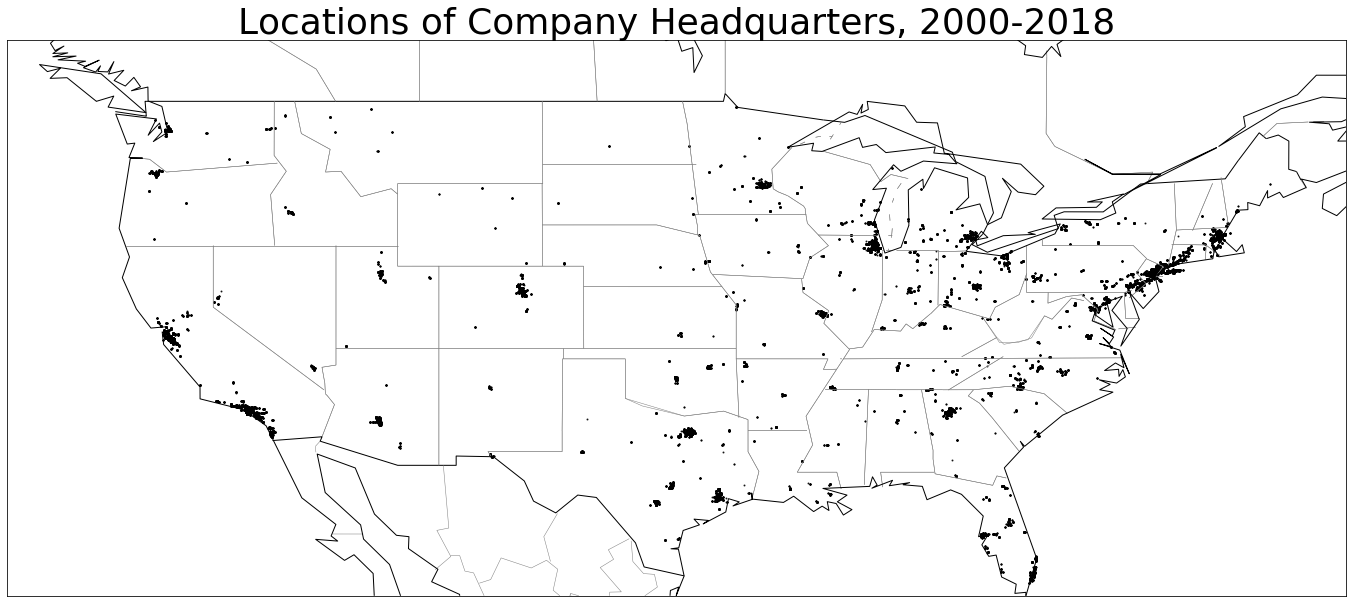

In [16]:
plt.figure(figsize = (24, 16))
'''m = Basemap(
         projection='merc',
         llcrnrlon=-180,
         llcrnrlat=10,
         urcrnrlon=-50,
         urcrnrlat=70,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)'''

m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)


mx, my = m(hqs['longitude'].values, hqs['latitude'].values)
pos = {}
colors = {}
for count, elem in enumerate (hqs['gvkey_year']):
     pos[elem] = (mx[count], my[count])

for count, elem in enumerate (data.index):
    colors[count] = colorList[count]

        
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(), 
                    node_color = 'black', alpha = 0.8, node_size = 1)
'''nx.draw_networkx_edges(G = graph, pos = pos, edge_color = colorList,
                    alpha=0.005, arrows = False)
'''        
    
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
plt.title("Locations of Company Headquarters, 2000-2018", 
          fontsize = 36)

/Users/brianreed/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/brianreed/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


Text(0.5, 1.0, 'Customer - Supplier Ties, 2000-2018')

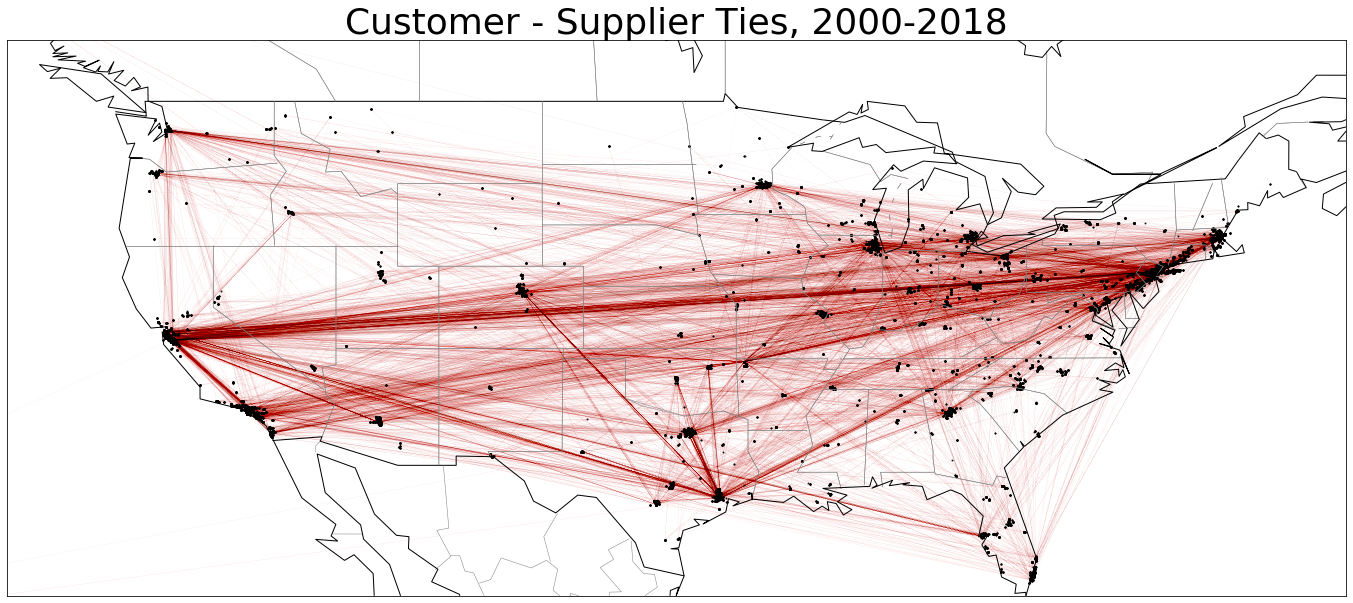

In [17]:
plt.figure(figsize = (24, 16))
'''m = Basemap(
         projection='merc',
         llcrnrlon=-180,
         llcrnrlat=10,
         urcrnrlon=-50,
         urcrnrlat=70,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)'''

m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)


mx, my = m(hqs['longitude'].values, hqs['latitude'].values)
pos = {}
colors = {}
for count, elem in enumerate (hqs['gvkey_year']):
     pos[elem] = (mx[count], my[count])

for count, elem in enumerate (data.index):
    colors[count] = colorList[count]

        
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(), 
                    node_color = 'black', alpha = 0.8, node_size = 1)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color = colorList,
                    alpha=0.005, arrows = False)
        
    
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
plt.title("Customer - Supplier Ties, 2000-2018", 
          fontsize = 36)

# Get states python
Make a heatmap of the state-state flows.

In [273]:
stateFlows = pd.read_csv("../../data/companyData/hqsWithStates.csv").drop(columns = {'X','Unnamed: 0'})[['custState',
                                                                                                         'suppState']]

In [274]:
stateFlows.head()

,custState,suppState
0,Illinois,Ohio
1,Arkansas,Arizona
2,New Jersey,New Jersey
3,Missouri,Illinois
4,Texas,Oklahoma


In [275]:
stateFlows['ties'] = 1
stateFlows = stateFlows[['custState','suppState','ties']].\
    groupby(['custState','suppState']).sum().reset_index()

In [287]:
stateFlowsPivot = stateFlows.pivot(index = 'custState', 
                              columns = 'suppState', 
                              values = 'ties').\
    fillna(0)

In [288]:
stateFlows.sort_values(by = ['ties'],ascending = False)[0:50]

,custState,suppState,ties
835,Texas,Texas,4123
70,California,California,3797
801,Texas,California,1230
104,California,Texas,943
585,New York,California,905
264,Illinois,California,875
441,Michigan,Michigan,744
829,Texas,Oklahoma,603
802,Texas,Colorado,570
84,California,Massachusetts,554


Do the absolute counts.

In [286]:
reordered = stateFlowsPivot.reindex(stateFlowsPivot.mean().sort_values(ascending = False).index, axis = 1)
reordered = reordered.reindex(reordered.mean().sort_values(ascending = False).index, axis = 0)
reordered = reordered.fillna(0)


mask = np.zeros_like(reordered)
mask[np.triu_indices_from(mask)] = True
for i in range(0,mask.shape[0]):
    mask[i,i] = 0.0

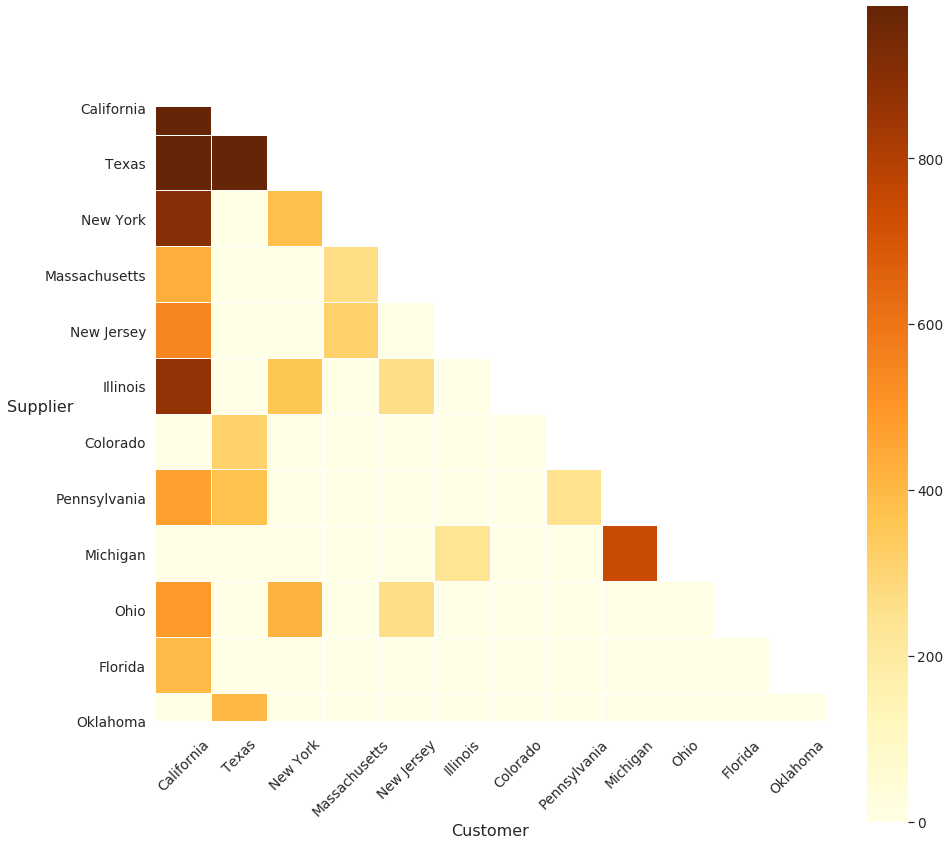

In [260]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    sns.set(font_scale=1.25)
    ax = sns.heatmap(reordered, 
                     mask=mask, 
                     robust=True,
                     square=True,
                     linewidths = 0.1,
                     cmap="YlOrBr")
    ax.set_xlabel('Customer', fontsize = 16)
    ax.tick_params(axis='x', rotation = 45, pad = 10)
    ax.set_ylabel('Supplier', fontsize = 16, rotation = 0)


And some normalizations.

In [292]:
normdStateFlows = stateFlowsPivot*1/(stateFlowsPivot.sum(axis = 0))

maskNormd = np.zeros_like(normdStateFlows)
maskNormd[np.triu_indices_from(maskNormd)] = True
for i in range(0,maskNormd.shape[0]):
    maskNormd[i,i] = 0.0

In [323]:
reorderedNormd = normdStateFlows.reindex(normdStateFlows.mean(axis = 1).sort_values(ascending = False).index, axis = 1)
reorderedNormd = reorderedNormd.reindex(reorderedNormd.mean(axis = 1).sort_values(ascending = False).index, axis = 0)
reorderedNormd = reorderedNormd.fillna(0)


Check a couple of these: for a given supplier-state, what fraction of other states' imports are they responsible for?

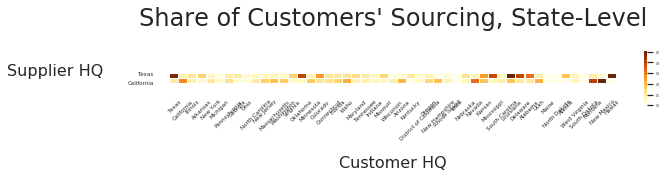

In [371]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.margins(x = 2, y = 2)
    sns.set(font_scale=0.25)
    ax = sns.heatmap(reorderedNormd[reorderedNormd.index.isin(['Texas', 'California'])], 
                     # mask=maskNormd, 
                     robust=True,
                     square=True,
                     linewidths = 0.1,
                     cmap="YlOrBr",
                    cbar_kws=dict(use_gridspec=False,
                                  location="right",pad=0.05,shrink=0.1))
    
    
    
    ax.set_xlabel('Customer HQ', fontsize = 16, labelpad=15)
    ax.tick_params(axis='x', rotation = 45, pad = 10)
    
    ax.set_ylabel('Supplier HQ', fontsize = 16, rotation = 0, labelpad=72)
    ax.tick_params(axis='y', rotation = 0, pad = 10)

    ax.set_title("Share of Customers' Sourcing, State-Level", 
                 fontsize = 24,
                pad = 48)
    
    plt.savefig('../../data/companyData/sampleStates.png')


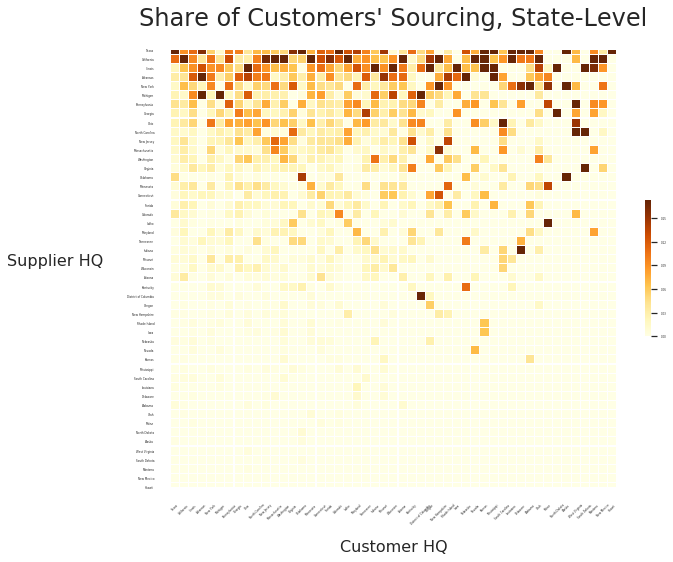

In [385]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.margins(x = 2, y = 2)
    sns.set(font_scale=0.25)
    ax = sns.heatmap(reorderedNormd[reorderedNormd.index], 
                     # mask=maskNormd, 
                     robust=True,
                     square=True,
                     linewidths = 0.1,
                     cmap="YlOrBr",
                    cbar_kws=dict(use_gridspec=False,
                                  location="right",pad=0.05,shrink=0.25))
    
    
    
    ax.set_xlabel('Customer HQ', fontsize = 16, labelpad=15)
    ax.tick_params(axis='x', pad = 10,  rotation = 45)
    
    ax.set_ylabel('Supplier HQ', fontsize = 16, rotation = 0, labelpad=72)
    ax.tick_params(axis='y', rotation = 0, pad = 10)

    ax.set_title("Share of Customers' Sourcing, State-Level", 
                 fontsize = 24,
                pad = 24)
    
    plt.savefig('../../data/companyData/sampleStates.png')
